<a href="https://colab.research.google.com/github/ToheebOlatunji/PERSONAL-PROJECTS-AND-MODELS/blob/main/3D_Surface_Plot_Temperature%2C_Grain_Size%2C_Conductivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

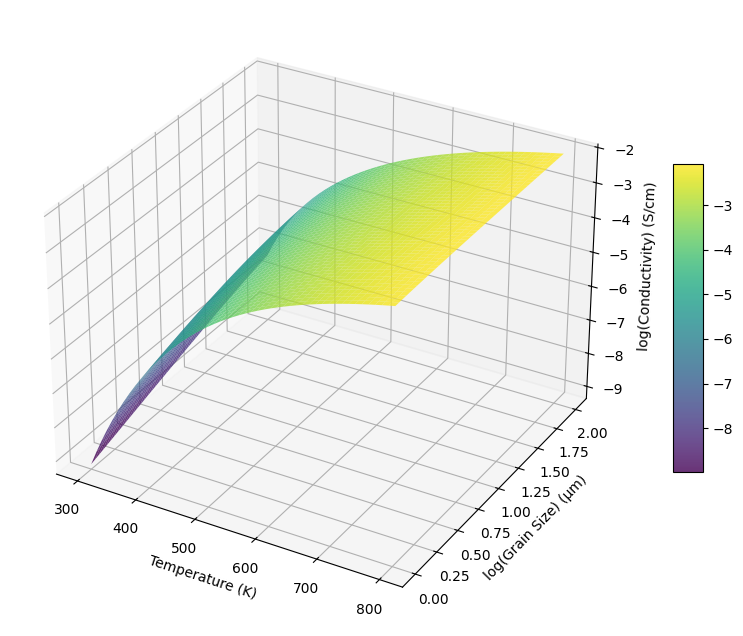

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create meshgrid
T_range = np.linspace(300, 800, 50)      # Temperature range (K)
D_range = np.logspace(0, 2, 50)          # Grain size range (μm)
T_mesh, D_mesh = np.meshgrid(T_range, D_range)

# Calculate conductivity surface
sigma_bulk_mesh = (1e4 / T_mesh) * np.exp(-0.5 / (8.617e-5 * T_mesh))
sigma_gb_mesh = (5e3 / T_mesh) * np.exp(-0.8 / (8.617e-5 * T_mesh))
sigma_total_mesh = 1 / (1 / sigma_bulk_mesh + 1e-3 / (D_mesh * sigma_gb_mesh))

# Plot 3D surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(
    T_mesh, np.log10(D_mesh), np.log10(sigma_total_mesh),
    cmap='viridis', alpha=0.8
)

ax.set_xlabel('Temperature (K)')
ax.set_ylabel('log(Grain Size) (μm)')
ax.set_zlabel('log(Conductivity) (S/cm)')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.show()
